## **Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini berkaitan dengan prediksi risiko obesitas berdasarkan sejumlah fitur terkait gaya hidup dan kesehatan individu. Dataset ini dapat diperoleh dari repositori publik Kaggle

*  Ketentuan Dataset:

  -   Dataset ini berisi informasi mengenai jenis kelamin, umur, tinggi badan, berat badan, riwayat keluarga terkait obesitas, frekuensi konsumsi makanan berkalori tinggi, kebiasaan merokok, konsumsi kalori, aktivitas fisik, penggunaan teknologi, dan lainnya.
  
  -  Kolom target dalam dataset ini adalah NObeyesdad, yang mewakili tingkat obesitas individu dengan berbagai kategori.

### **Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### **Data Wrangling**

Informasi Terkait Tabel pada Dataset

Dataset ini berisi kolom-kolom berikut yang merepresentasikan berbagai fitur:


- Gender: Jenis kelamin.

- Age: Umur.

- Height: Tinggi badan.

- Weight: Berat badan.

- family_history_with_overweight: Apakah memiliki riwayat keluarga dengan berat badan berlebih.

- FAVC: Frekuensi mengonsumsi makanan berkalori tinggi.

- FCVC: Frekuensi konsumsi sayuran.

- NCP: Jumlah makanan utama yang dikonsumsi per hari.

- CAEC: Kebiasaan konsumsi camilan (nyemil).

- SMOKE: Status merokok.

-  CH2O: Jumlah air yang diminum per hari.

- SCC: Kebiasaan memantau asupan kalori.

- FAF: Frekuensi aktivitas fisik per minggu.

- TUE: Waktu yang dihabiskan menggunakan perangkat teknologi setiap hari.

- CALC: Konsumsi alkohol.

- MTRANS: Jenis transportasi yang digunakan sehari-hari.

- NObeyesdad: Tingkat obesitas (label target).

### **Gathering Data**

Memuat atau load Data menggunakan library pandas

In [ ]:
#menampilkan tabel
df= pd.read_csv("/content/drive/MyDrive/Dataset/ObesityDataSet.csv")
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### **Assessing Data**

proses ini bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Menampilkan jumlah missing values yang terdapat dalam setiap kolom data**

In [ ]:
#memeriksa missing value pada kolom tabel
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
print("Jumlah duplikasi pada data day.cvs: ", df.duplicated().sum())

Jumlah duplikasi pada data day.cvs:  24


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### **Cleaning Data**

In [ ]:
#Membersihkan data duplikat
df = df.drop_duplicates()
print("Jumlah duplikasi pada data day.cvs: ", df.duplicated().sum())

In [ ]:
# Mengubah data kategorikal menjadi numerik menggunakan OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Female', 'Male']])
df[['Gender']] = encoder.fit_transform(df[['Gender']])

encoder = OrdinalEncoder(categories=[['no', 'yes']])
df[['family_history_with_overweight']] = encoder.fit_transform(df[['family_history_with_overweight']])
df[['FAVC']] = encoder.fit_transform(df[['FAVC']])
df[['SMOKE']] = encoder.fit_transform(df[['SMOKE']])
df[['SCC']] = encoder.fit_transform(df[['SCC']])

encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df[['CAEC']] = encoder.fit_transform(df[['CAEC']])
df[['CALC']] = encoder.fit_transform(df[['CALC']])

encoder = OrdinalEncoder(categories=[['Walking', 'Bike', 'Motorbike', 'Public_Transportation', 'Automobile']])
df[['MTRANS']] = encoder.fit_transform(df[['MTRANS']])

encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
df[['NObeyesdad']] = encoder.fit_transform(df[['NObeyesdad']])

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,3.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,3.0


### **Visualisasi Data**

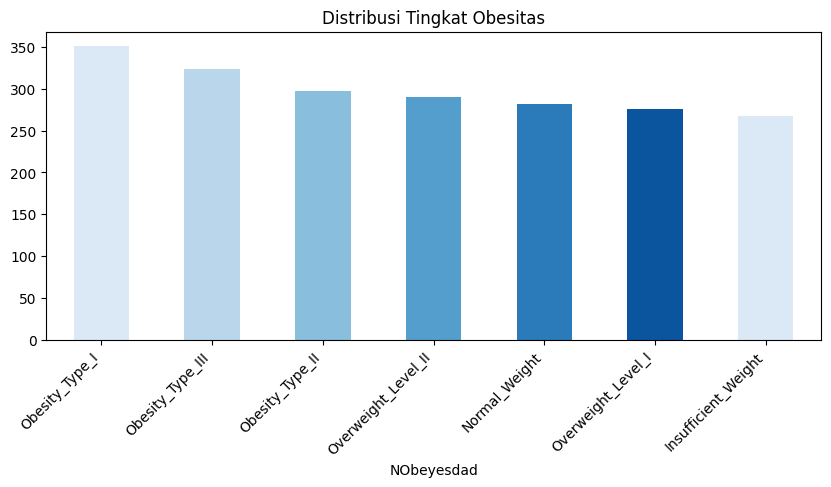

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Distribusi Tingkat Obesitas')
df['NObeyesdad'].value_counts().plot(kind='bar', color=sns.color_palette("Blues"))
plt.xticks(rotation=45, ha='right')
plt.show()

Male: 1052
Female: 1035


<Axes: xlabel='Gender', ylabel='count'>

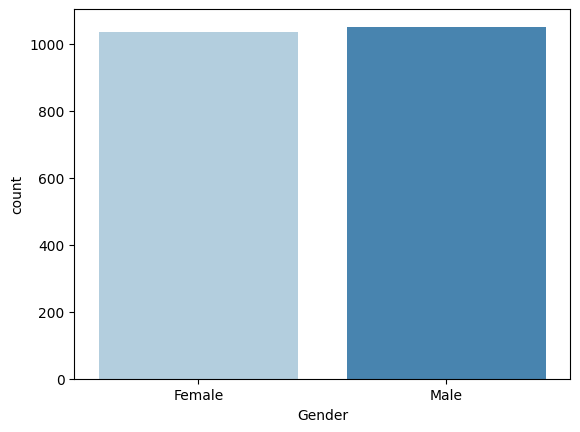

In [ ]:
print(f"Male: {df['Gender'].value_counts().iloc[0]}")
print(f"Female: {df['Gender'].value_counts().iloc[1]}")

sns.countplot(data=df, x="Gender", hue="Gender", palette="Blues")

In [ ]:
df.groupby(["Gender", "NObeyesdad"]).size().reset_index(name="count")

,Gender,NObeyesdad,count
0,Female,Insufficient_Weight,169
1,Female,Normal_Weight,137
2,Female,Obesity_Type_I,156
3,Female,Obesity_Type_II,2
4,Female,Obesity_Type_III,323
5,Female,Overweight_Level_I,145
6,Female,Overweight_Level_II,103
7,Male,Insufficient_Weight,98
8,Male,Normal_Weight,145
9,Male,Obesity_Type_I,195


<Axes: xlabel='NObeyesdad', ylabel='count'>

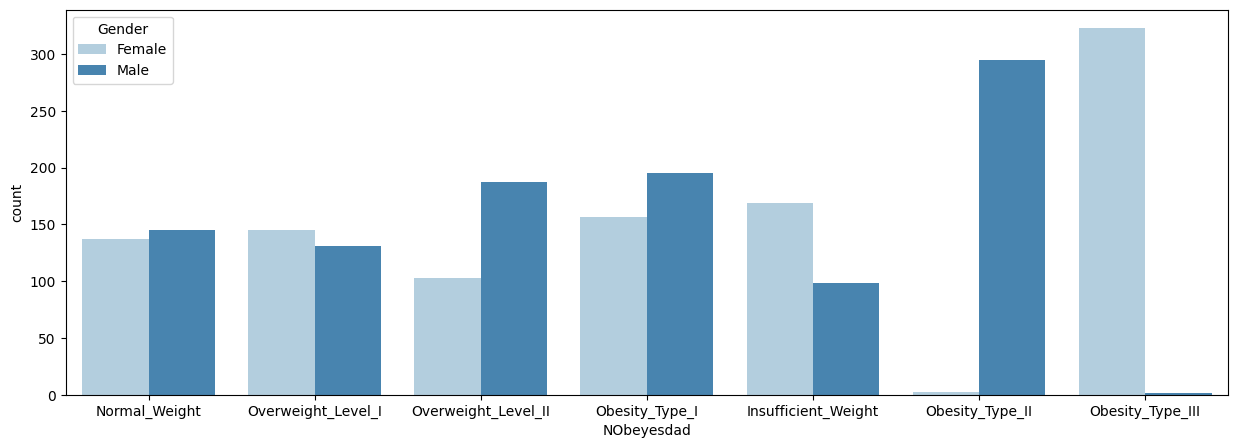

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="NObeyesdad", hue="Gender", palette="Blues")

<ipython-input-27-e3380c990199>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SMOKE', palette='Blues')


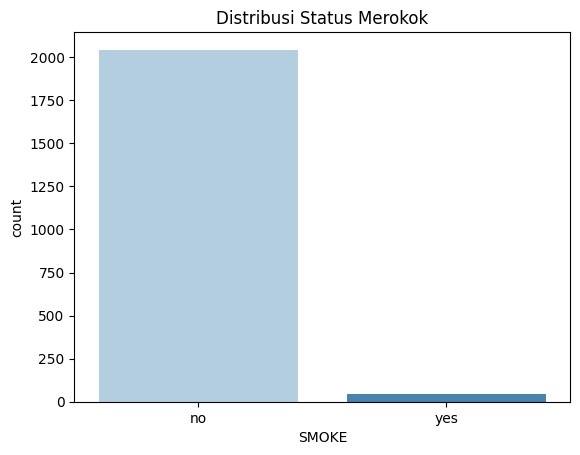

In [ ]:
# Visualisasi untuk kolom Smoke
sns.countplot(data=df, x='SMOKE', palette='Blues')
plt.title('Distribusi Status Merokok')
plt.show()

<ipython-input-28-e5cbb0011077>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FAVC', palette='Blues')


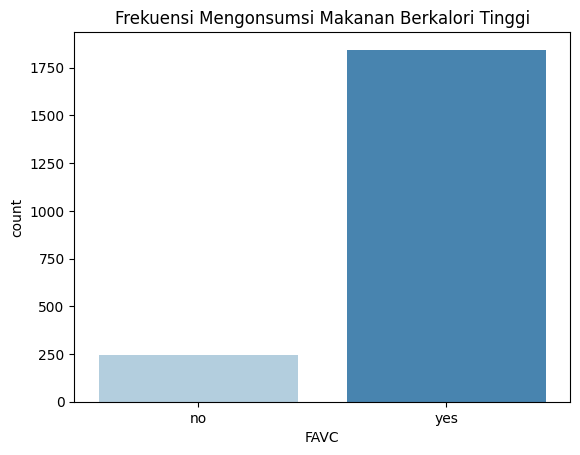

In [ ]:
# Visualisasi untuk kolom FAVC
sns.countplot(data=df, x='FAVC', palette='Blues')
plt.title('Frekuensi Mengonsumsi Makanan Berkalori Tinggi')
plt.show()

<ipython-input-36-4487158b20b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='family_history_with_overweight', palette='Blues')


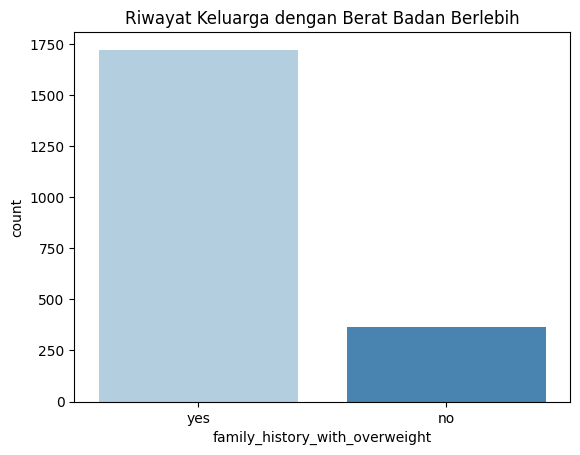

In [ ]:
# Visualisasi untuk kolom family_history_with_overweight
sns.countplot(data=df, x='family_history_with_overweight', palette='Blues')
plt.title('Riwayat Keluarga dengan Berat Badan Berlebih')
plt.show()

<ipython-input-35-aac3c313ec9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CAEC', palette='Blues')


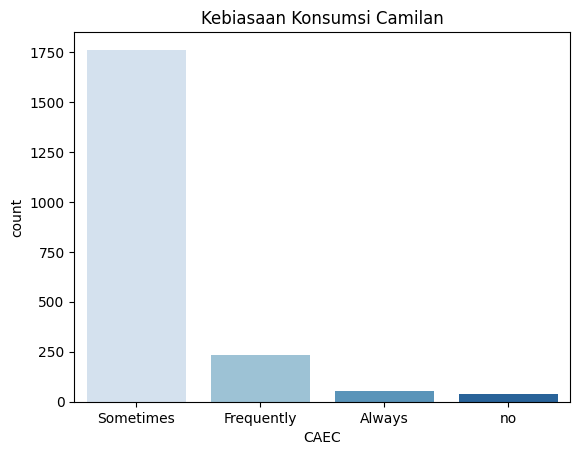

In [ ]:
# Visualisasi untuk kolom CAEC
sns.countplot(data=df, x='CAEC', palette='Blues')
plt.title('Kebiasaan Konsumsi Camilan')
plt.show()

<ipython-input-38-cde3119f011d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CALC', palette='Blues')


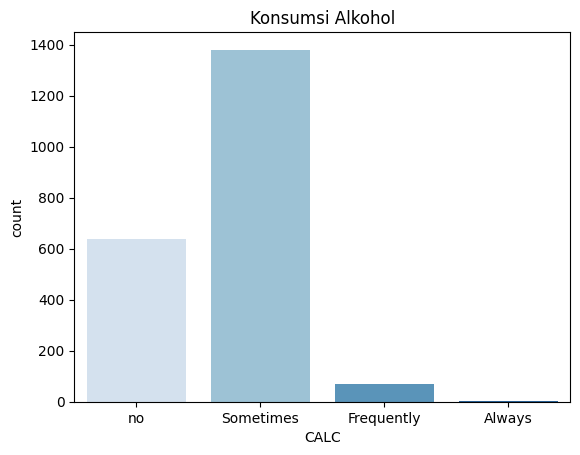

In [ ]:
# Visualisasi untuk kolom CALC
sns.countplot(data=df, x='CALC', palette='Blues')
plt.title('Konsumsi Alkohol')
plt.show()

<ipython-input-39-63f52305fb98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MTRANS', palette='Blues')


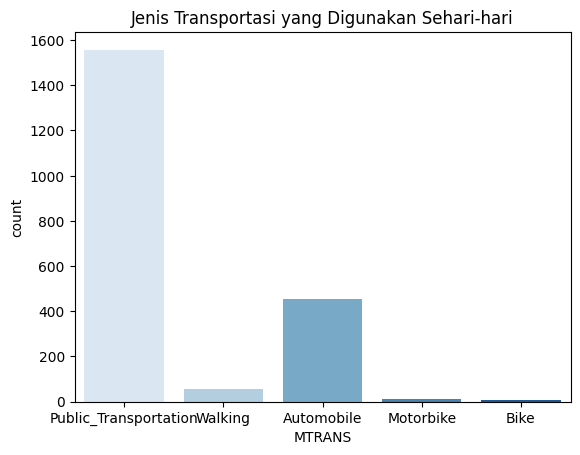

In [ ]:
# Visualisasi untuk kolom MTRANS
sns.countplot(data=df, x='MTRANS', palette='Blues')
plt.title('Jenis Transportasi yang Digunakan Sehari-hari')
plt.show()

### **Data Preprocessing**

In [ ]:
# Memisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

memisahkan variabel independen (X) dan variabel target (y), di mana targetnya adalah NObeyesdad.

In [ ]:
# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi data latih dan uji dengan perbandingan 80:20 untuk memastikan model dapat dievaluasi secara objektif.

### **Data Modelling**

Model klasifikasi Random Forest digunakan karena kemampuannya dalam menangani dataset yang kompleks dan memberikan hasil yang stabil. Model ini dilatih dengan menggunakan data latih yang telah dipisahkan sebelumnya.

In [ ]:
# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Setelah model dilatih, prediksi dilakukan pada data uji, dan hasil evaluasi dilakukan menggunakan metrik seperti accuracy, precision, recall, dan f1-score.

In [ ]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9617224880382775

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        59
         1.0       0.88      0.93      0.90        61
         2.0       0.96      0.91      0.93        55
         3.0       0.94      0.98      0.96        49
         4.0       0.99      0.97      0.98        70
         5.0       1.00      1.00      1.00        64
         6.0       1.00      1.00      1.00        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



**Hasil:**

Accuracy: 96.17% menunjukkan bahwa model memiliki akurasi yang tinggi dalam memprediksi tingkat obesitas.

Classification Report: Metrik ini menunjukkan bahwa model memberikan hasil yang sangat baik, dengan f1-score yang tinggi di semua kelas.

Confusion matrix digunakan untuk lebih memahami performa model dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kategori. Hasil confusion matrix memberikan gambaran tentang jumlah kesalahan prediksi yang terjadi pada model.

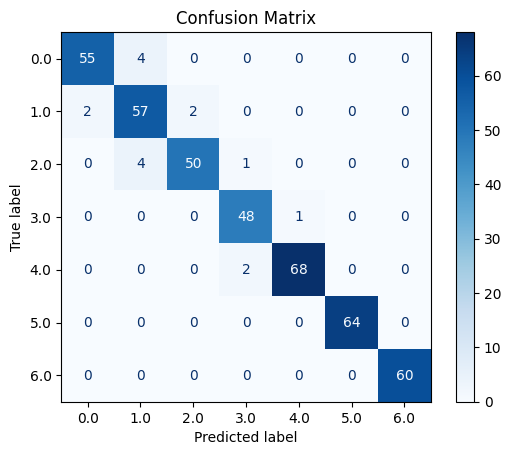

In [ ]:
# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()